# Exploratory Data Analysis of Online Retail Data
Written by: Usama Qureshi\
Date: 25.09.2023\
Email: usama.qureshi27@gmail.com

## Loading Data

### Importing Libraries

In [1]:
# Importing the required libraries for EDA
import pandas as pd 
import numpy as np 
import seaborn as sns            #visualisation
import matplotlib.pyplot as plt  #visualisation

%matplotlib inline     
sns.set(color_codes=True)

### Loading the data into the data frame

In [2]:
#  Loading the data into the data frame

df = pd.read_excel("C:/Users/usama/OneDrive/Desktop/Online Retail.xlsx")

# To display the top 5 rows 
# df.head(10)
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## Exploring Data 

In [3]:
df.shape

(541909, 8)

In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [8]:
df.describe(include='object')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [9]:
# Finding unique values
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [10]:
# Total Records
print('Total records(rows) in the dataset : {}'. format(df.shape[0]))
print('Total records(columns) in the dataset : {}'. format(df.shape[1]))

Total records(rows) in the dataset : 541909
Total records(columns) in the dataset : 8


## Cleaning and Validating data

### Formating the columns

In [11]:
# Change the customer id column type into object
df['CustomerID'] = df.CustomerID.astype(str)

In [12]:
# Transform columns name into lower case

df.columns = df.columns.str.lower()
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [13]:
# Separate words using underscore _

df.rename(columns = { 'invoiceno':'invoice_no', 'stockcode':'stock_code', 'invoicedate':'invoice_date', 
                     'unitprice':'unit_price', 'customerid':'customer_id'}, inplace = True)

### Checking and dropping the duplicate rows

In [14]:
df.customer_id

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: customer_id, Length: 541909, dtype: object

In [15]:
# Dropping the primary key column i.e customer_id and storing into a temporary dataframe.
df_dedupped = df.drop('customer_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(df_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(df.shape[0]))

Number of records after removing customer_id (pk), duplicates : 536641
Number of records in original dataset : 541909


Since both the numbers are different, there are duplicate records in the dataset.

In [16]:
# Checking duplicates
df.duplicated().sum()

5268

In [17]:
# Removing duplicates
df = df.drop_duplicates()
df.shape

(536641, 8)

### Dealing with missing values

In [18]:
df.isnull().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
customer_id        0
country            0
dtype: int64

In [19]:
df.isnull().sum()/len(df)*100 

invoice_no      0.000000
stock_code      0.000000
description     0.270945
quantity        0.000000
invoice_date    0.000000
unit_price      0.000000
customer_id     0.000000
country         0.000000
dtype: float64

In [20]:
# Droping all the records where description is null
df_index_drop = df[df['description'].isnull()].index
df.drop(index= df_index_drop, inplace=True, axis = 0)

In [21]:
df.isnull().sum()/len(df)*100 

invoice_no      0.0
stock_code      0.0
description     0.0
quantity        0.0
invoice_date    0.0
unit_price      0.0
customer_id     0.0
country         0.0
dtype: float64

Since, the percentange of missing values in customer id is very high, so we can't remove the indexes but to fill it

In [22]:
# Filling all the null values of customer_id with missing
df['customer_id'].fillna('Missing', inplace=True, axis=0)
df.isnull().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

### Inconsistency Check

Check whether there is inconsistent data / typo error data is present in the categorical columns.

In [23]:
# df.country.nunique() 
df.country.unique() 

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [24]:
df['country'] = df['country'].apply(lambda x : x.replace('RSA' , 'South Africa'))
df['country'] = df['country'].apply(lambda x : x.replace('EIRE' , 'Ireland'))

In [25]:
# df.country.nunique() 
df.country.unique() 

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'South Africa'], dtype=object)

In [26]:
df.description.nunique() 

4223

In [27]:
# Replace unclear discriptions with not know
df['description'].replace(to_replace = ["?" , "??" , "???", "? sold as sets?" , "?lost" ,"?display?" ,
                                        "?missing", "????missing" , "????damages????"] , value = 'not know', inplace = True)

In [28]:
df.description.nunique() 

4215

In [29]:
# Function to replace stock code with one alphabet abbrevation to atleast three

def replace_stock_code(stock_code):
    
    if stock_code == 'M' :
        return 'MAN'  
    elif stock_code =='D' :
        return 'DISC'
    elif stock_code =='S' :
        return 'SAMP'
    elif stock_code =='C2' :
        return 'CARR'
    elif stock_code =='B' :
        return 'BADDEBT'     
    else :
        return stock_code

# Applying the above fuction to state column

df['stock_code'] = df['stock_code'].apply(replace_stock_code)

### Detecting Outliers

<Axes: ylabel='quantity'>

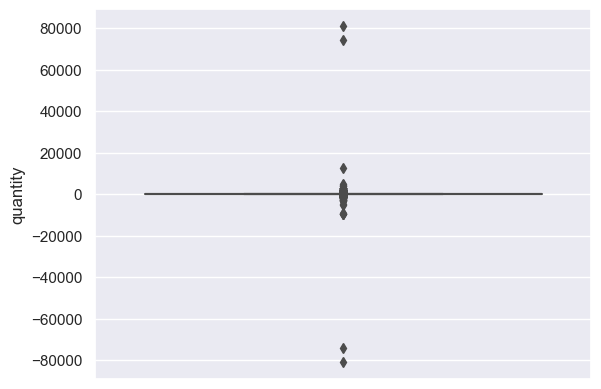

In [30]:
sns.boxplot(y = 'quantity' , data = df)

<Axes: ylabel='unit_price'>

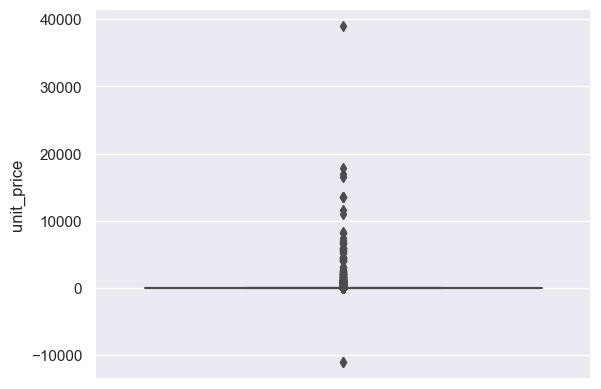

In [31]:
sns.boxplot(y = 'unit_price' , data = df)

In [32]:
df.shape

(535187, 8)

In [33]:
# IQR method

q1 = df.unit_price.quantile(0.25)
q3 = df.unit_price.quantile(0.75)
iqr = q3-q1
outliers = df.unit_price[((df.unit_price < (q1-1.5*iqr)) | (df.unit_price>(q3+1.5*iqr)))] 
outliers


16         9.95
45        18.00
65        10.95
141       27.50
151       14.95
          ...  
541768    18.00
541786    11.95
541831     8.50
541849     9.95
541892     8.95
Name: unit_price, Length: 39450, dtype: float64

In [34]:
df = df [(df['unit_price'] < (q3+1.5*iqr)) & (df['unit_price']>(q1-1.5*iqr))]

df.shape 

(495737, 8)

In [35]:
Q1 = df['quantity'].quantile(0.25)
Q3 = df['quantity'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# df[df['quantity'] > upper_limit]
# df[df['quantity'] < lower_limit]

df = df[(df['quantity'] < upper_limit) & (df['quantity'] > lower_limit)]

df.shape

(467703, 8)

<Axes: ylabel='quantity'>

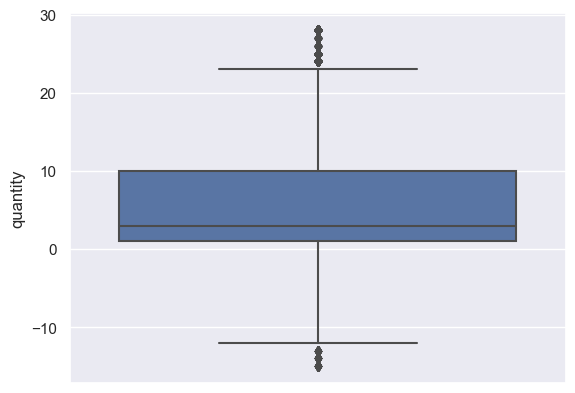

In [36]:
sns.boxplot(y = 'quantity' , data = df)

<Axes: ylabel='unit_price'>

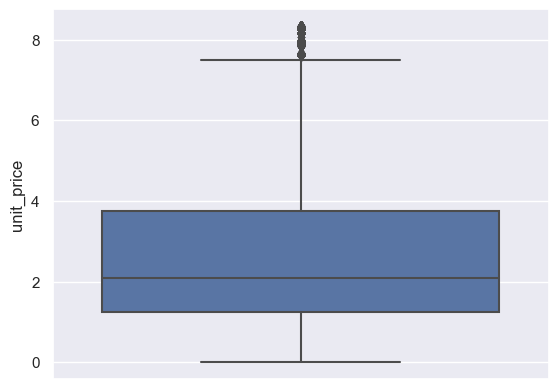

In [37]:
sns.boxplot(y = 'unit_price' , data = df)

In [38]:
# create a column having day of week
df['day_of_week'] = df['invoice_date'].dt.day_name()
df['day_of_week']

0         Wednesday
1         Wednesday
2         Wednesday
3         Wednesday
4         Wednesday
            ...    
541904       Friday
541905       Friday
541906       Friday
541907       Friday
541908       Friday
Name: day_of_week, Length: 467703, dtype: object

In [39]:
# create a column having day of week
df['month_of_year'] = df['invoice_date'].dt.month_name()
df['month_of_year']

0         December
1         December
2         December
3         December
4         December
            ...   
541904    December
541905    December
541906    December
541907    December
541908    December
Name: month_of_year, Length: 467703, dtype: object

In [40]:
# create a column with sale
df['sale'] = df['unit_price']*df['quantity']
df['sale']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: sale, Length: 467703, dtype: float64

<Axes: >

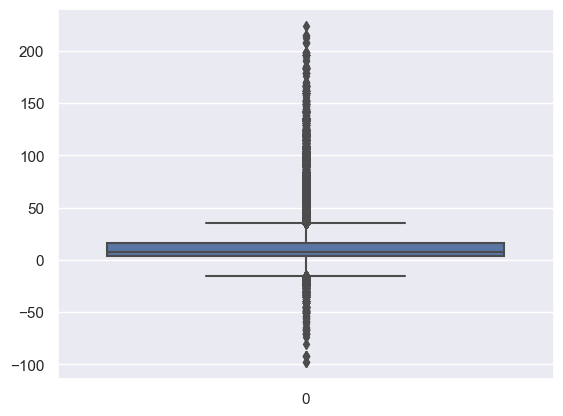

In [41]:
sns.boxplot(df['sale'])

In [42]:
df.shape

(467703, 11)

In [43]:
df.tail(20)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,day_of_week,month_of_year,sale
541888,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-12-09 12:31:00,0.95,15804.0,United Kingdom,Friday,December,11.40
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,Friday,December,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,Friday,December,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,Friday,December,30.00
541893,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom,Friday,December,70.80
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,Friday,December,23.40
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,Friday,December,19.80
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,Friday,December,19.80
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France,Friday,December,15.00
541898,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680.0,France,Friday,December,15.00


## Analyzing the data

#### 1. Data visualization to gain insights into the dataset.

In [44]:
df.nunique()

invoice_no       21237
stock_code        3737
description       3868
quantity            43
invoice_date     19628
unit_price         328
customer_id       4229
country             38
day_of_week          6
month_of_year       12
sale              2234
dtype: int64

In [45]:
df.dtypes

invoice_no               object
stock_code               object
description              object
quantity                  int64
invoice_date     datetime64[ns]
unit_price              float64
customer_id              object
country                  object
day_of_week              object
month_of_year            object
sale                    float64
dtype: object

Text(0.5, 1.0, 'Maximum business based upon country')

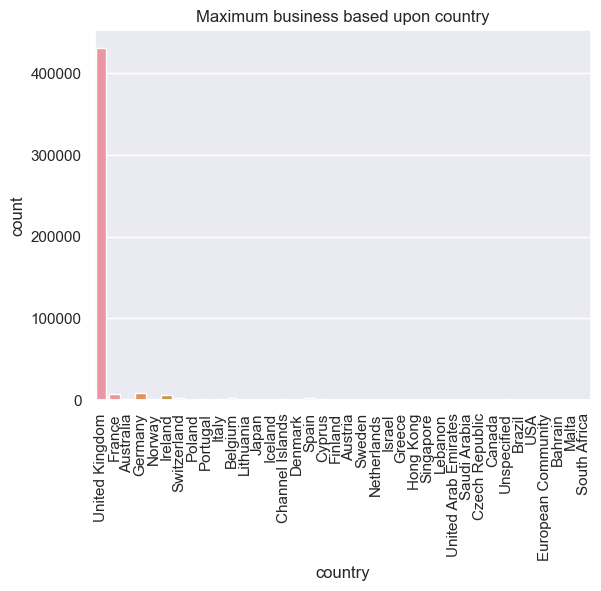

In [46]:
sns.countplot(data = df , x = "country" )
plt.xticks(rotation = 90)
plt.title('Maximum business based upon country')

In [48]:
top_10_country = df['country'].value_counts()[:10]

print(top_10_country)

country
United Kingdom    431219
Germany             8024
France              7282
Ireland             6469
Spain               2144
Belgium             1725
Switzerland         1659
Portugal            1336
Norway               816
Italy                676
Name: count, dtype: int64


Text(0.5, 1.0, 'Correlation between quantity vs unit price')

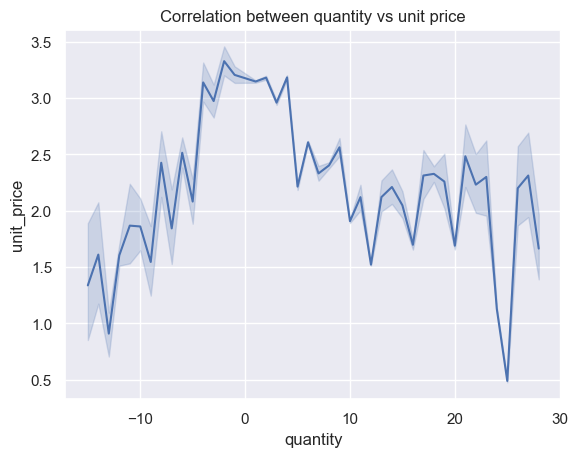

In [49]:
sns.lineplot(data = df , x = "quantity" , y = 'unit_price')
plt.title('Correlation between quantity vs unit price')

### 2. Analyze the sales trends over time

Text(0.5, 1.0, 'Maximum business based upon month')

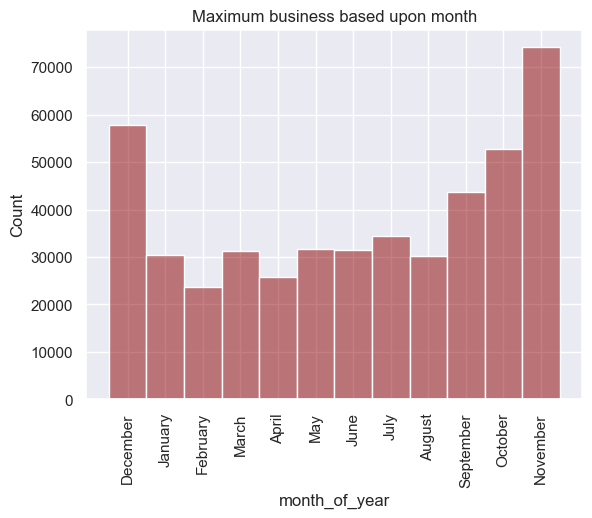

In [50]:
# Identify the busiest months

sns.histplot(data = df , x = 'month_of_year' , color = 'darkred' , bins = 10, alpha = 0.5)
plt.xticks(rotation = 90)
plt.title('Maximum business based upon month')

In [55]:
df.groupby('month_of_year')['sale'].sum()

month_of_year
April        292390.841
August       373905.030
December     639422.660
February     275233.440
January      318982.510
July         370825.811
June         359896.050
March        355934.190
May          397319.090
November     805079.740
October      609094.140
September    558963.472
Name: sale, dtype: float64

Text(0.5, 1.0, 'Maximum sales based upon month')

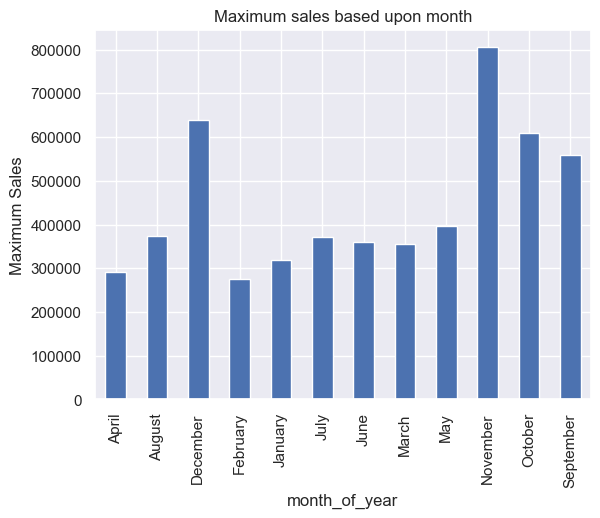

In [61]:
# Identify the profitable months

df.groupby('month_of_year')['sale'].sum().plot(kind='bar')
plt.xticks(rotation = 90)
plt.ylabel('Maximum Sales')
plt.title('Maximum sales based upon month')

Text(0.5, 1.0, 'Maximum business based upon week day')

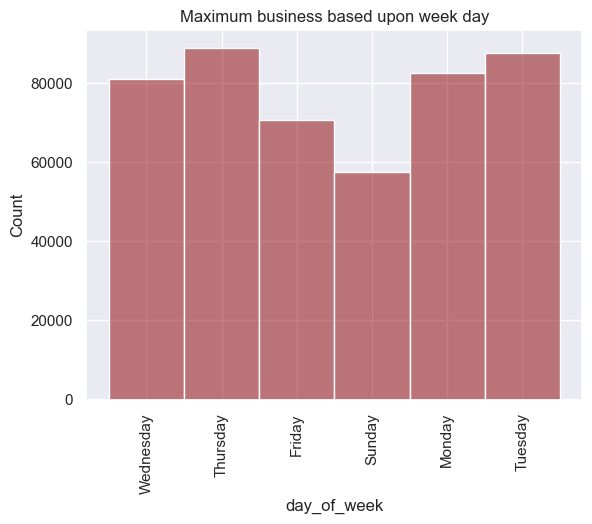

In [57]:
# Identify the busiest day of week

sns.histplot(data = df , x = 'day_of_week'  , bins = 10, color = 'darkred' , alpha = 0.5)
plt.xticks(rotation = 90)
plt.title('Maximum business based upon week day')

Text(0.5, 1.0, 'Maximum sales based upon week day')

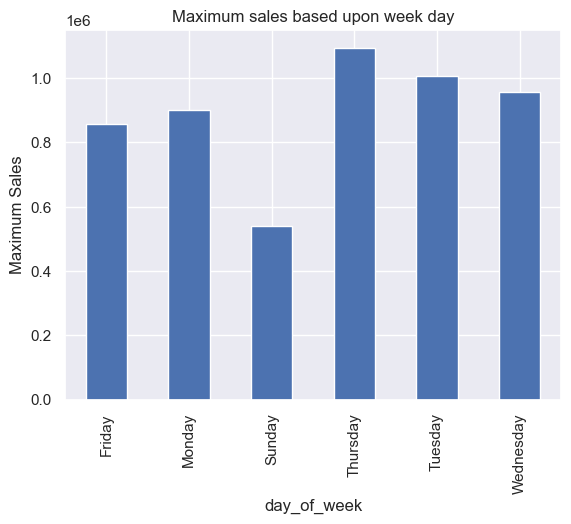

In [60]:
# Identify the profitable days

df.groupby('day_of_week')['sale'].sum().plot(kind='bar')
plt.xticks(rotation = 90)
plt.ylabel('Maximum Sales')
plt.title('Maximum sales based upon week day')

### 3. Explore the top-selling products and countries based on the quantity sold.

In [72]:
plt.figure(figsize = (10,12))
plt.title('Maximum business based upon country')
plt.bar('country', df['quantity'] , edgecolor = 'k' , width = 0.7)
plt.xlabel('Countries')
plt.ylabel('Maximum Sales')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

NameError: name 'description' is not defined

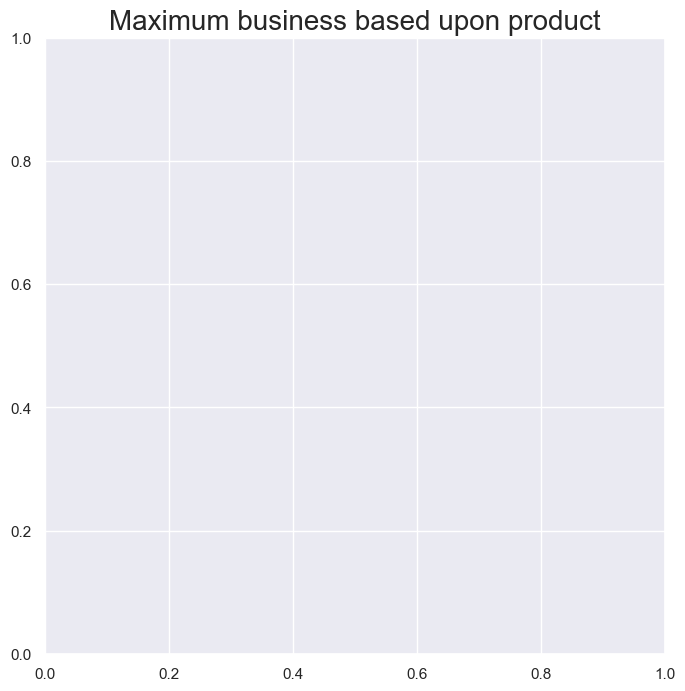

In [ ]:
plt.figure(figsize = (8,8))
plt.title('Maximum business based upon product', fontsize = 20)
plt.pie (df['description'].value_counts()[:5], autopct= '%.2f' , labels = description.index)
plt.show()

### 4. Identify any outliers or anomalies in the dataset 

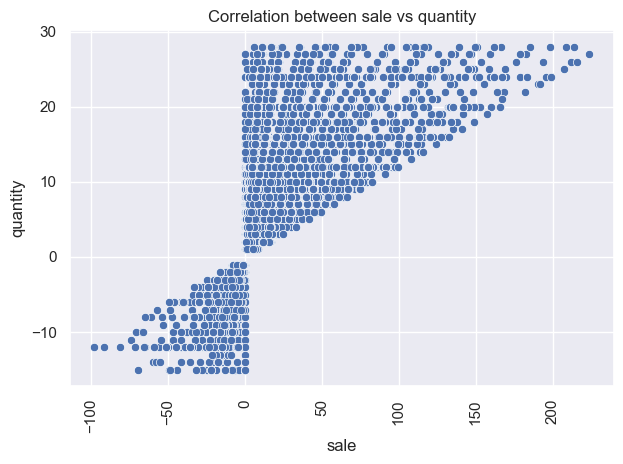

In [63]:
# correlation between sale and quantity 
sns.scatterplot( x = 'sale'  , y = 'quantity' , data = df )
plt.title('Correlation between sale vs quantity')
plt.xticks(rotation = 90)
plt.tight_layout()

The main anomaly found is the negative sale values of any item sold. Hence, in this dataset, this anomaly is removed by appluing a condition and further removing the outliers.

In [64]:
df1 = df[df['sale']>0]

In [65]:
df1.shape

(460512, 11)

<Axes: >

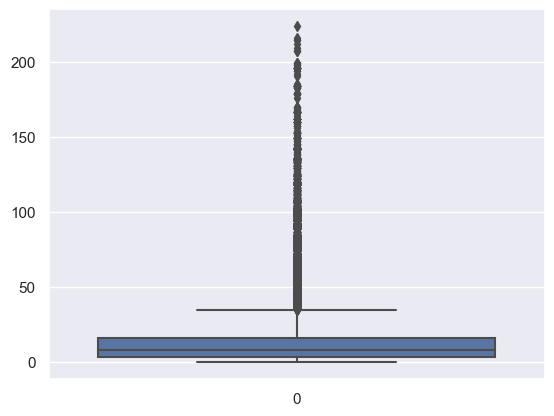

In [66]:
sns.boxplot(df1['sale'])

In [67]:
Qu1 = df1['sale'].quantile(0.25)
Qu3 = df1['sale'].quantile(0.75)
IqR = Qu3 - Qu1

upper_limit = Qu3 + 1.5 * IqR
lower_limit = Qu1 - 1.5 * IqR

df1 = df1[(df1['sale'] < upper_limit) & (df1['sale'] > lower_limit)]

df1.shape

(439928, 11)

<Axes: >

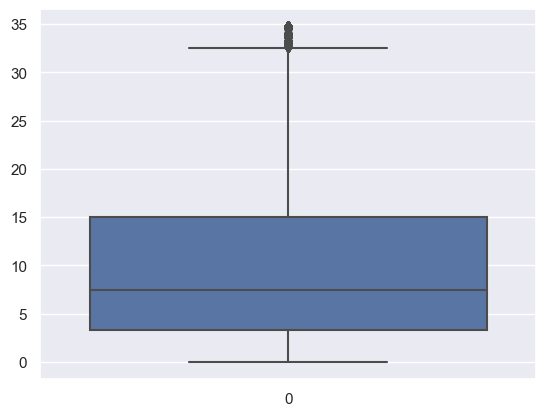

In [68]:
sns.boxplot(df1['sale'])

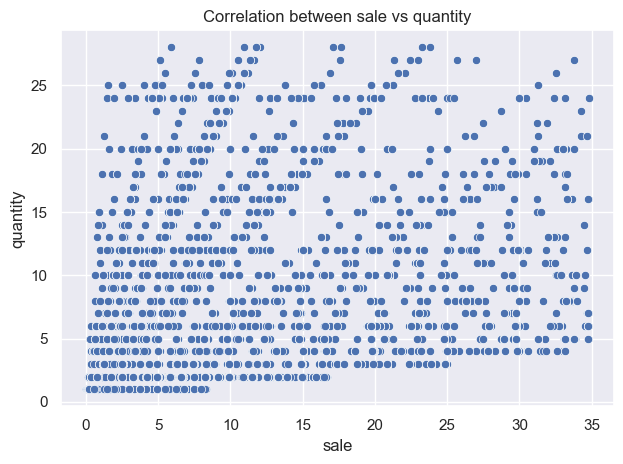

In [69]:
# correlation between sale and quantity 
sns.scatterplot( x = 'sale'  , y = 'quantity' , data = df1 )
plt.title('Correlation between sale vs quantity')
plt.tight_layout()

## Findings and Conclusions
- Clear and well-supported conclusions that provide meaningful insights into the problem being explored
 
- Appropriate recommendations or next steps based on the analysis

- A clear explanation of any limitations or areas for further research





